# `Imported Libraries`.

In [1]:
import os
import io
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as tkr
import psycopg2
import xlsxwriter
import scipy.stats
import dataframe_image as dfi
import warnings

#==#

from io import BytesIO
from numpy import mean, absolute
from numpy import median, absolute
from sqlalchemy import create_engine
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.ticker import FuncFormatter
from matplotlib import font_manager
from matplotlib import colormaps
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.cbook import boxplot_stats
from pandas.io.formats.style import Styler
from pandas.io.formats.excel import ExcelFormatter
from openpyxl import Workbook
from scipy import stats
from scipy.stats import norm # Normalization of data
from scipy.stats import trim_mean
from statistics import variance
from statistics import stdev
from sklearn.preprocessing import StandardScaler # Standardize data
from fpdf import FPDF
from PIL import Image
from IPython.display import HTML, display
from sklearn.linear_model import LinearRegression # Involves solving a system of linear equations

#==#

#pd.options.display.max_columns = 100
pd.set_option('display.max_columns', 100)
%matplotlib inline

# `Load Dataframe`.

#### `As Excel`.

In [2]:
# file_path = r"\Users\tailb\Downloads\X.xlsx"
# sales = pd.read_excel(file_path)
# df = sales.copy()
# df.head(3)

#### `As CSV`.

In [3]:
file_path = r"\Users\tailb\Downloads\Fashion_Retail_Sales.csv"
sales = pd.read_csv(file_path)
df = sales.copy()
df.head(3)

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash


# `Analyse Dataframe`.

#### 1.`Display dataframe numeric statistics`

In [4]:
df.describe()

,Customer Reference ID,Purchase Amount (USD),Review Rating
count,3400.000000,2750.000000,3076.000000
mean,4039.660588,156.709818,2.999057
std,48.122583,419.536669,1.156505
min,3957.000000,10.000000,1.000000
25%,3997.000000,57.000000,2.000000
50%,4040.000000,110.000000,3.000000
75%,4081.000000,155.750000,4.000000
max,4122.000000,4932.000000,5.000000


#### 2.`Display dataframe non-numeric statistics`

In [5]:
df.describe(include=object)

,Item Purchased,Date Purchase,Payment Method
count,3400,3400,3400
unique,50,365,2
top,Belt,22-09-2023,Credit Card
freq,90,17,1770


#### 3.`Display index`.

In [6]:
df.index

RangeIndex(start=0, stop=3400, step=1)

#### 4.`Display number of rows and columns`.

In [7]:
df.shape

(3400, 6)

#### 5.`Display the number of rows times number of columns`.

In [8]:
df.size

20400

#### 6.`Display information about dataset`.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB


#### 7.`Display the first 5 rows from our dataset`.

In [10]:
df.head(5)

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash
3,4097,Leggings,3126.0,15-03-2023,3.2,Cash
4,3997,Wallet,3003.0,27-11-2022,4.7,Cash


#### 8.` Clean column headings`.

In [11]:
# Extract columns
cols = df.columns
# Create empty list
new_cols = []
# Iterate to fix issues with names
for column in cols:
    # #  To proper case
    # proper_cols = column.title()
    # To lower case
    lower_cols = column.lower()
    # Replace space/hyphen with underscore
    proper_cols_hyphen = lower_cols.replace(" ", "_")
    clean_col = proper_cols_hyphen.replace("-", "_")
    # Append to empty list
    new_cols.append(clean_col)
# Diplay columns
new_cols

# Replace existing columns in dataframe with new
df.columns = new_cols

# Preview
df.head(3)

,customer_reference_id,item_purchased,purchase_amount_(usd),date_purchase,review_rating,payment_method
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash


#### 9.`Display a sample of 5 rows from our dataset`.

In [12]:
df.sample(5) 

# # Select 10% of the data randomly to explore a subset of a large dataset
# df.sample(frac=0.1, random_state=42)

,customer_reference_id,item_purchased,purchase_amount_(usd),date_purchase,review_rating,payment_method
1744,3975,Backpack,71.0,09-02-2023,1.6,Cash
1366,4045,Tank Top,21.0,11-04-2023,4.3,Cash
2818,4006,Belt,144.0,22-01-2023,3.7,Credit Card
1646,4037,Sun Hat,33.0,02-12-2022,4.4,Cash
3274,4059,Boots,56.0,02-02-2023,NaN,Cash


#### 10.`Display data types of each column`.

In [13]:
df.dtypes

customer_reference_id      int64
item_purchased            object
purchase_amount_(usd)    float64
date_purchase             object
review_rating            float64
payment_method            object
dtype: object

#### 11.`Convert data types in specified columns`.

In [14]:
 # Convert interger to a string
df['customer_reference_id'] = df['customer_reference_id'].astype(str)

#==#

# Convert object to datetime.
# Then convert to string in desired string format
df['date_purchase'] = pd.to_datetime(df['date_purchase'], format='%d-%m-%Y')#.dt.strftime('%Y-%m-%d') 

#==#

# Dislay data types
df.dtypes

#==#

# Convert object to datetime (# errors='coerce' will turn invalid formats into NaT (Not a Time) that can be spotted and dropped)
# df['date_purchase'] = pd.to_datetime(df['date_purchase'], errors='coerce') 

customer_reference_id            object
item_purchased                   object
purchase_amount_(usd)           float64
date_purchase            datetime64[ns]
review_rating                   float64
payment_method                   object
dtype: object

#### 12.`Show duplicates`.

In [15]:
df.duplicated() # Find duplicates. TRUE = Duplicated values present.

0       False
1       False
2       False
3       False
4       False
        ...  
3395    False
3396    False
3397    False
3398    False
3399    False
Length: 3400, dtype: bool

#### 13.`Show duplicates in columnar form`.

In [16]:
df.duplicated().any() # Find if there are any duplicates. TRUE = Duplicated values present. 

False

#### 14.`Delete/Remove duplicate rows based on all columns`.

In [17]:
#df.drop_duplicates() #(subset=None, keep=’first’, inplace=False, ignore_index=False)

#### 15.`Show null values in dataframe`.

In [18]:
df.isnull() # Display null/empty values. TRUE  = Null values present. # df.isna() can be used as well!

,customer_reference_id,item_purchased,purchase_amount_(usd),date_purchase,review_rating,payment_method
0,False,False,False,False,True,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3395,False,False,False,False,False,False
3396,False,False,False,False,False,False
3397,False,False,True,False,False,False
3398,False,False,False,False,False,False


#### 16.`Display booleans for null/missing values in columnar form`.

In [19]:
df.isnull().any().to_frame('Boolean').sort_values(by='Boolean',ascending=False).reset_index().rename(columns={'index':'Column name'})

,Column name,Boolean
0,purchase_amount_(usd),True
1,review_rating,True
2,customer_reference_id,False
3,item_purchased,False
4,date_purchase,False
5,payment_method,False


#### 17.`Display sum of null/missing values in columnar form - A`.

In [20]:
df.isnull().sum().to_frame('Sum of Missing Values').sort_values(by='Sum of Missing Values',ascending=False)\
    .reset_index().rename(columns={'index':'Column Name'}).style.format({"Sum of Missing Values": "{:,.0f}"})

,Column Name,Sum of Missing Values
0,purchase_amount_(usd),650
1,review_rating,324
2,customer_reference_id,0
3,item_purchased,0
4,date_purchase,0
5,payment_method,0


#### 18.`Display the sum of null/missing values in columnar form - B`.

In [21]:
missing_sum = df.isnull().sum().round(2)
print(missing_sum)

#==#

# missing_sum = round(df.isnull().sum(),2)
# print(missing_sum)

customer_reference_id      0
item_purchased             0
purchase_amount_(usd)    650
date_purchase              0
review_rating            324
payment_method             0
dtype: int64


#### 19.`Display the sum of null/missing values in columnar form - C`(Function utilised).

In [22]:
def missing_cols(df):
    #prints out columns with its amount of missing values
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(df)

purchase_amount_(usd) => 650
review_rating => 324


#### 20.`Display the % of null/missing values in columnar form - A`.

In [23]:
missing_pct = df.isnull().sum()/len(df) * 100
print(missing_pct.round(2))

#missing_pct = round(df.isnull().sum()/len(df) * 100, 2)
#print(missing_pct)

customer_reference_id     0.00
item_purchased            0.00
purchase_amount_(usd)    19.12
date_purchase             0.00
review_rating             9.53
payment_method            0.00
dtype: float64


#### 21.`Visualise null/missing values with Seaborn Heatmap`.

<Axes: >

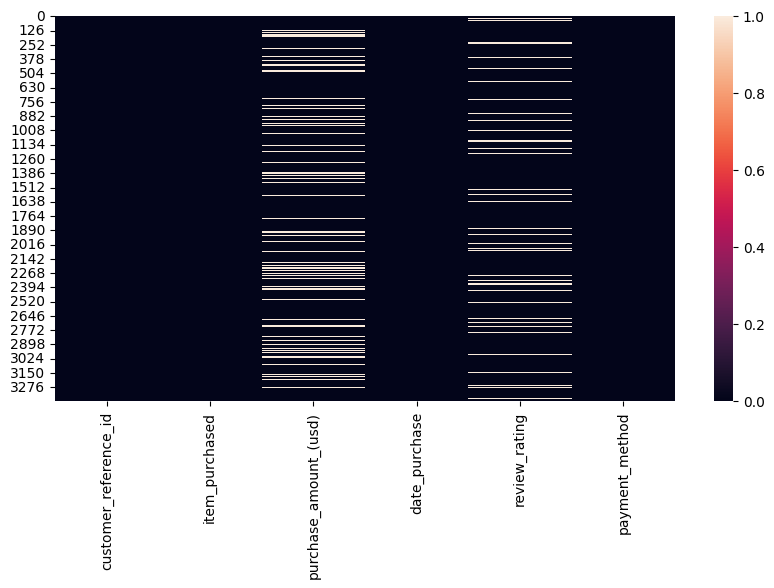

In [24]:
# Extract the column names
cols = df.columns

# Plot a heatmap of missing values with seaborn
plt.figure(figsize = (10,5))
sns.heatmap(df[cols].isnull())

# `Clean Dataframe`.

## `Handle Missing Values`.

#### 1.`Fill columns with null/missing values in the dataframe with text of choice`.

In [25]:
# df.fillna({'customer_name':'Not Stated',
#            'customer_type':'Not Stated',
#            'customer_type':'Not Stated',
#            'pos_location_name':'Not Stated',
#            'billing_country':'Not Stated',
#            'billing_region':'Not Stated',
#            'billing_city':'Not Stated',
#            'shipping_country':'Not Stated',
#            'shipping_region':'Not Stated',
#            'shipping_city':'Not Stated',
#            'product_type':'Not Stated',
#            'product_vendor':'Not Stated',
#            'product_title':'Not Stated',
#            'variant_title':'Not Stated',
#            'variant_sku':'Not Stated',     
#            }, inplace=True)

#### 2.`Interpolate a value to replace null/missing values & not a time (NAT) values based on its neighbors`.

In [26]:
df['date_purchase'] = df['date_purchase'].interpolate(method='linear', limit_direction='both')  # For NaT values
df['purchase_amount_(usd)'] = df['purchase_amount_(usd)'].interpolate(method='linear', limit_direction='both')  # For NaN values
df['review_rating'] = df['review_rating'].interpolate(method='linear', limit_direction='both')  # For NaN values
df.sample(5) # Display a sample of 5 rows from our dataset

#==#

# df = df.interpolate(method='linear') # This will work for the entire dataframe and apply linear interpolation to both NaN and NaT values where applicable. Check first!
# df = df.interpolate(method='linear', limit_direction='both') # This allows interpolation in both directions, filling start/end NaNs

,customer_reference_id,item_purchased,purchase_amount_(usd),date_purchase,review_rating,payment_method
2564,4000,Hoodie,149.000000,2023-08-17,4.4,Credit Card
2709,4027,Boots,110.666667,2023-03-23,4.9,Credit Card
1201,4037,Sneakers,175.500000,2023-02-11,4.4,Cash
2746,3963,Vest,110.000000,2023-07-09,4.8,Cash
601,3986,Tunic,126.000000,2023-01-30,4.1,Cash


##### 3. `Round float in specified column(s) to 0 decimal places`.

In [27]:
df['purchase_amount_(usd)'] = df['purchase_amount_(usd)'].round(0) # Round Float to 0 decimal places
df['review_rating'] = df['review_rating'].round(0) # Round Float to 0 decimal places
df.sample(5) # Display a sample of 5 rows from our dataset

,customer_reference_id,item_purchased,purchase_amount_(usd),date_purchase,review_rating,payment_method
858,4115,Jacket,178.0,2023-05-09,2.0,Credit Card
1239,3987,T-shirt,146.0,2022-11-23,4.0,Credit Card
21,3986,Gloves,4298.0,2023-04-05,4.0,Cash
2083,3973,Sun Hat,162.0,2022-12-21,4.0,Cash
510,4063,Slippers,39.0,2023-08-16,4.0,Credit Card


#### 3. `Replace NaN and -inf values with 0`.

In [28]:
# df = df.replace([np.nan, -np.inf], 0)

#### 4.`Replace inf & -inf values with null/missing values and drop from rows`.

In [29]:
# df.replace([np.inf, -np.inf], np.nan).dropna(axis=0,inplace=True) # 0 = rows, 1 = Rows

#### 5.`Display booleans for null/missing values in columnar form`.

In [30]:
df.isnull().any().to_frame('Boolean').sort_values(by='Boolean',ascending=False).reset_index().rename(columns={'index':'Column name'})

,Column name,Boolean
0,customer_reference_id,False
1,item_purchased,False
2,purchase_amount_(usd),False
3,date_purchase,False
4,review_rating,False
5,payment_method,False


#### 6.`Display sum of missing values in columnar form - A`.

In [31]:
df.isnull().sum().to_frame('Sum of Missing Values').sort_values(by='Sum of Missing Values',ascending=False)\
    .reset_index().rename(columns={'index':'Column Name'}).style.format({"Sum of Missing Values": "{:,.0f}"})

,Column Name,Sum of Missing Values
0,customer_reference_id,0
1,item_purchased,0
2,purchase_amount_(usd),0
3,date_purchase,0
4,review_rating,0
5,payment_method,0


#### 7.`Display the sum of missing values in columnar form - B`.

In [32]:
missing_sum = df.isnull().sum().round(2)
print(missing_sum)

#missing_sum = round(df.isnull().sum(),2)
#print(missing_sum)

customer_reference_id    0
item_purchased           0
purchase_amount_(usd)    0
date_purchase            0
review_rating            0
payment_method           0
dtype: int64


#### 8.`Display the sum of missing values in columnar form - C`(Function utilised).

In [33]:
def missing_cols(df):
    #prints out columns with its amount of missing values
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(df)

no missing values left


#### 9.`Display the % of null/missing values in columnar form - A`.

In [34]:
missing_pct = df.isnull().sum()/len(df) * 100
print(missing_pct.round(2))

#missing_pct = round(df.isnull().sum()/len(df) * 100, 2)
#print(missing_pct)

customer_reference_id    0.0
item_purchased           0.0
purchase_amount_(usd)    0.0
date_purchase            0.0
review_rating            0.0
payment_method           0.0
dtype: float64


#### 10.`Display the % of null/missing values in in columnar form - B`(Function utilised)

In [35]:
def missing_pct(df):
    for col in df.columns:
        pct = df[col].isnull().sum()/(len(df))
        #pct = df[col].isnull().sum()/(len(df)) * 100
        if(pct != 0):
            print(f"{col} => {pct:.2%}")
            #print("{} : {}%".format(col, round(pct,2)))
    if(pct == 0):
        print("no missing values left")

missing_pct(df)

no missing values left


#### 11.`Visualise null/missing values with Seaborn Heatmap`.

<Axes: >

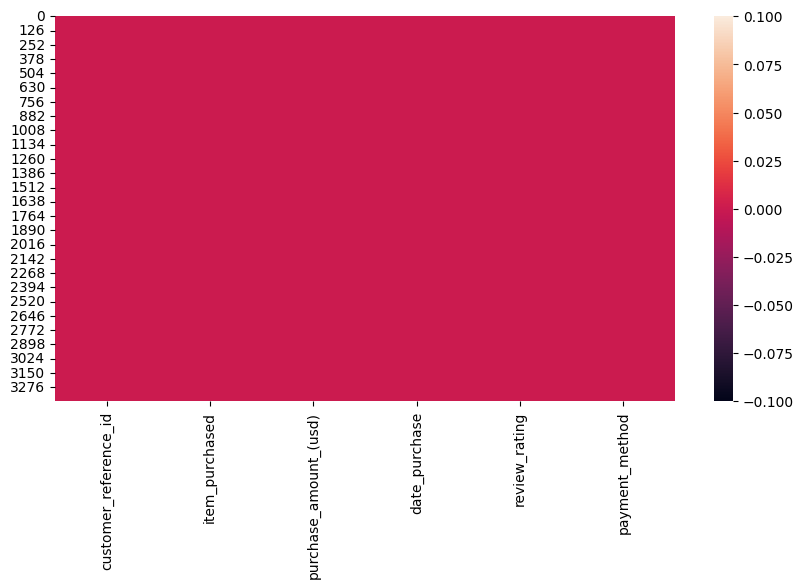

In [36]:
# Extract the column names
cols = df.columns

# Plot a heatmap of missing values with seaborn
plt.figure(figsize = (10,5))
sns.heatmap(df[cols].isnull())

## `Modify Dataframe`.

#### Apply `.loc` and `.between` to group by `size` and create a new column displaying size.

In [37]:
# df.loc[df['purchase_amount_(usd)'].between(0, 100), 'size'] = '1'
# df.loc[df['purchase_amount_(usd)'].between(100, 200), 'size'] = '2'
# df.loc[df['purchase_amount_(usd)'].between(200, 300), 'size'] = '3'
# df.loc[df['purchase_amount_(usd)'].between(300, 400), 'size'] = '4'
# df.loc[df['purchase_amount_(usd)'].between(400, 500), 'size'] = '5'
# df.loc[df['purchase_amount_(usd)'].between(500, 600), 'size'] = '6'
# df.loc[df['purchase_amount_(usd)'].between(600, 700), 'size'] = '7'
# df.loc[df['purchase_amount_(usd)'].between(700, 800), 'size'] = '8'
# df.loc[df['purchase_amount_(usd)'].between(800, 900), 'size'] = '9'
# df.loc[df['purchase_amount_(usd)'].between(900, 1000), 'size'] = '10'
# df.loc[df['purchase_amount_(usd)'].between(1000, 1100), 'size'] = '11'
# df.loc[df['purchase_amount_(usd)'].between(1100, 1200), 'size'] = '12'
# df.loc[df['purchase_amount_(usd)'].between(1200, 1300), 'size'] = '13'
# df.loc[df['purchase_amount_(usd)'].between(1300, 1400), 'size'] = '14'
# df.loc[df['purchase_amount_(usd)'].between(1400, 1500), 'size'] = '15'
# df.loc[df['purchase_amount_(usd)'].between(1500, 1600), 'size'] = '16'
# df.loc[df['purchase_amount_(usd)'].between(1600, 1700), 'size'] = '17'
# df.loc[df['purchase_amount_(usd)'].between(1700, 1800), 'size'] = '18'
# df.loc[df['purchase_amount_(usd)'].between(1800, 1900), 'size'] = '19'
# df.loc[df['purchase_amount_(usd)'].between(1900, 2000), 'size'] = '20'
# df.loc[df['purchase_amount_(usd)'].between(2000, 2100), 'size'] = '21'
# df.loc[df['purchase_amount_(usd)'].between(2100, 2200), 'size'] = '22'
# df.loc[df['purchase_amount_(usd)'].between(2200, 2300), 'size'] = '23'
# df.loc[df['purchase_amount_(usd)'].between(2300, 2400), 'size'] = '24'
# df.loc[df['purchase_amount_(usd)'].between(2400, 2500), 'size'] = '25'
# df.loc[df['purchase_amount_(usd)'].between(2500, 2600), 'size'] = '26'
# df.loc[df['purchase_amount_(usd)'].between(2600, 2700), 'size'] = '27'
# df.loc[df['purchase_amount_(usd)'].between(2700, 2800), 'size'] = '28'
# df.loc[df['purchase_amount_(usd)'].between(2800, 2900), 'size'] = '29'
# df.loc[df['purchase_amount_(usd)'].between(2900, 3000), 'size'] = '30'
# df.loc[df['purchase_amount_(usd)'].between(3000, 3100), 'size'] = '32'
# df.loc[df['purchase_amount_(usd)'].between(3100, 3200), 'size'] = '33'
# df.loc[df['purchase_amount_(usd)'].between(3200, 3300), 'size'] = '34'
# df.loc[df['purchase_amount_(usd)'].between(3300, 3400), 'size'] = '35'
# df.loc[df['purchase_amount_(usd)'].between(3400, 3500), 'size'] = '36'
# df.loc[df['purchase_amount_(usd)'].between(3500, 3600), 'size'] = '37'
# df.loc[df['purchase_amount_(usd)'].between(3600, 3700), 'size'] = '38'
# df.loc[df['purchase_amount_(usd)'].between(3700, 3800), 'size'] = '39'
# df.loc[df['purchase_amount_(usd)'].between(3800, 3900), 'size'] = '40'
# df.loc[df['purchase_amount_(usd)'].between(3900, 4000), 'size'] = '41'
# df.loc[df['purchase_amount_(usd)'].between(4000, 4100), 'size'] = '42'
# df.loc[df['purchase_amount_(usd)'].between(4100, 4200), 'size'] = '43'
# df.loc[df['purchase_amount_(usd)'].between(4200, 4300), 'size'] = '44'
# df.loc[df['purchase_amount_(usd)'].between(4300, 4400), 'size'] = '45'
# df.loc[df['purchase_amount_(usd)'].between(4400, 4500), 'size'] = '46'
# df.head(3)

#### Apply `pd.to_datetime` and `dt.normalize` to convert a `time stamped` string to `date` and create a new column displaying date.

In [38]:
# df['date'] = pd.to_datetime(df['date_purchase'], format='%d/%m/%Y %H:%M').dt.normalize() # Use if category timestamped
# df.head(2)
#==#
# df['date']=pd.to_datetime(df['date_purchase']).dt.normalize() # Use if category timestamped
# df.head(2)
#==#
# # df['date']=df['date_purchase'].dt.date # Use if category timestamped
# df.head(2)

#### Apply `df.loc` and `dt.hour.between` to convert a `time stamped` string to `day`,`afternoon`,`evening` and `night` and create a new column displaying day, afternoon, evening and night.

In [39]:
# # Assign parts of the day based on time ranges
# # between_time() can’t handle time ranges that cross midnight (like '21:00' to '04:00'). So we split it into two parts
# df.loc[df['date_purchase'].dt.hour.between(5, 12), 'parts_of_the_day'] = 'morning'
# df.loc[df['date_purchase'].dt.hour.between(12, 17), 'parts_of_the_day'] = 'afternoon'
# df.loc[df['date_purchase'].dt.hour.between(17, 21), 'parts_of_the_day'] = 'evening'
# df.loc[df['date_purchase'].dt.hour.between(21, 23.59) \
#        | df['date_purchase'].dt.hour.between(0, 4) , 'parts_of_the_day'] = 'night'

# # Show the first few rows
# df.head(3)

##### `Display first few rows of 'parts_of_the_day'`.

In [40]:
# df[df['parts_of_the_day']=='morning'].head(2)

In [41]:
# df[df['parts_of_the_day']=='afternoon'].head(2)

In [42]:
# df[df['parts_of_the_day']=='evening'].head(3)

In [43]:
# df[df['parts_of_the_day']=='night'].head(3)

#### Apply `pd.to_datetime`,`format='%H:%M:%S'` and `dt.hour` to convert a `time stamped` string to `time` and create a new column displaying time.

In [44]:
# df['time']=df['date_purchase'].dt.hour # Use if category timestamped
# df.head(2)
#==#
# df['time']=pd.to_datetime(df['date_purchase'], format='%H:%M:%S').dt.hour # Use if category timestamped
# df.head(2)
#==#
# df['time']=df['date_purchase'].dt.time # Use if category timestamped
# df.head(2)
#==#
# df['time']=pd.to_datetime(df['date_purchase'], format='%H:%M:%S').dt.time # Use if category timestamped
# df.head(2)
#==#
# df['date_purchase'] = pd.to_datetime(df['date_purchase']) # Use if category timestamped
# df.head(2)

#### Apply `dt.day_name` to convert a string to `day` and create a new column displaying day.

In [45]:
df['day']=df['date_purchase'].dt.day_name()
df.head(2)

,customer_reference_id,item_purchased,purchase_amount_(usd),date_purchase,review_rating,payment_method,day
0,4018,Handbag,4619.0,2023-02-05,2.0,Credit Card,Sunday
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,Tuesday


#### Apply `dt.month_name` to convert strings to `month` and create a new column displaying month.

In [46]:
df['month']=df['date_purchase'].dt.month_name()
df.head(2)

,customer_reference_id,item_purchased,purchase_amount_(usd),date_purchase,review_rating,payment_method,day,month
0,4018,Handbag,4619.0,2023-02-05,2.0,Credit Card,Sunday,February
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,Tuesday,July


#### Apply `dt.strftime` to convert strings to `year` and create a new column displaying year.

In [47]:
df['year']=df['date_purchase'].dt.strftime('%Y')
df.head(2)

,customer_reference_id,item_purchased,purchase_amount_(usd),date_purchase,review_rating,payment_method,day,month,year
0,4018,Handbag,4619.0,2023-02-05,2.0,Credit Card,Sunday,February,2023
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,Tuesday,July,2023


#### Apply `pd.PeriodIndex`,`df.hour` and `fre='Q'` to convert a string to `quarter` and create a new column displaying quarter.

In [48]:
df['quarter'] = pd.PeriodIndex(df['date_purchase'], freq='Q')
df.head(2)

,customer_reference_id,item_purchased,purchase_amount_(usd),date_purchase,review_rating,payment_method,day,month,year,quarter
0,4018,Handbag,4619.0,2023-02-05,2.0,Credit Card,Sunday,February,2023,2023Q1
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,Tuesday,July,2023,2023Q3


#### Apply `dt.quarter`,`.map()` and `lambda q: f'Q{q}'` to convert a `time stamped` string to `quarter_label` and create a new column displaying quarter_label.

In [49]:
# df['quarter_label'] = df['date'].dt.quarter.map(lambda q: f'Q{q}')
# df.head(2)

#### Apply `dt.quarter`,`.map()` and `lambda q: f'Q{q}'` to convert a string to `quarter_label` and create a new column displaying quarter_label.

In [50]:
df['quarter_label'] = df['date_purchase'].dt.quarter.map(lambda q: f'Q{q}')
df.head(2)

,customer_reference_id,item_purchased,purchase_amount_(usd),date_purchase,review_rating,payment_method,day,month,year,quarter,quarter_label
0,4018,Handbag,4619.0,2023-02-05,2.0,Credit Card,Sunday,February,2023,2023Q1,Q1
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,Tuesday,July,2023,2023Q3,Q3


#### Apply `dt.strftime` to convert strings to `day_month` and create a new column displaying day_month.

In [51]:
df['day_month']=df['date_purchase'].dt.strftime('%a_%b')
df.head(2)

,customer_reference_id,item_purchased,purchase_amount_(usd),date_purchase,review_rating,payment_method,day,month,year,quarter,quarter_label,day_month
0,4018,Handbag,4619.0,2023-02-05,2.0,Credit Card,Sunday,February,2023,2023Q1,Q1,Sun_Feb
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,Tuesday,July,2023,2023Q3,Q3,Tue_Jul


#### Appl `dt.strftime` to convert strings to `day_year` and create a new column displaying day_year.

In [52]:
df['day_year']=df['date_purchase'].dt.strftime('%a_%Y')
df.head(2)

,customer_reference_id,item_purchased,purchase_amount_(usd),date_purchase,review_rating,payment_method,day,month,year,quarter,quarter_label,day_month,day_year
0,4018,Handbag,4619.0,2023-02-05,2.0,Credit Card,Sunday,February,2023,2023Q1,Q1,Sun_Feb,Sun_2023
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,Tuesday,July,2023,2023Q3,Q3,Tue_Jul,Tue_2023


#### Apply `dt.strftime` to convert strings to `month-year` and create a new column displaying month_year.

In [53]:
df['month_year']=df['date_purchase'].dt.strftime('%b_%Y')
df.head(2)

,customer_reference_id,item_purchased,purchase_amount_(usd),date_purchase,review_rating,payment_method,day,month,year,quarter,quarter_label,day_month,day_year,month_year
0,4018,Handbag,4619.0,2023-02-05,2.0,Credit Card,Sunday,February,2023,2023Q1,Q1,Sun_Feb,Sun_2023,Feb_2023
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,Tuesday,July,2023,2023Q3,Q3,Tue_Jul,Tue_2023,Jul_2023


#### Apply `dt.strftime` to convert strings to `day_month_year` and create a new column displaying day_month_year.

In [54]:
df['day_month_year']=df['date_purchase'].dt.strftime('%a_%b_%Y')
df.head(2)

,customer_reference_id,item_purchased,purchase_amount_(usd),date_purchase,review_rating,payment_method,day,month,year,quarter,quarter_label,day_month,day_year,month_year,day_month_year
0,4018,Handbag,4619.0,2023-02-05,2.0,Credit Card,Sunday,February,2023,2023Q1,Q1,Sun_Feb,Sun_2023,Feb_2023,Sun_Feb_2023
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,Tuesday,July,2023,2023Q3,Q3,Tue_Jul,Tue_2023,Jul_2023,Tue_Jul_2023


#### Apply `dt.strftime` to convert strings to `month_day_year` and create a new column displaying month_day_year.

In [55]:
df['month_day_year']=df['date_purchase'].dt.strftime('%b_%a_%Y')
df.head(2)

,customer_reference_id,item_purchased,purchase_amount_(usd),date_purchase,review_rating,payment_method,day,month,year,quarter,quarter_label,day_month,day_year,month_year,day_month_year,month_day_year
0,4018,Handbag,4619.0,2023-02-05,2.0,Credit Card,Sunday,February,2023,2023Q1,Q1,Sun_Feb,Sun_2023,Feb_2023,Sun_Feb_2023,Feb_Sun_2023
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,Tuesday,July,2023,2023Q3,Q3,Tue_Jul,Tue_2023,Jul_2023,Tue_Jul_2023,Jul_Tue_2023


#### Apply `.map()` to rename dataframe values in specified column(s).

In [56]:
# # Rename dataframe values in a specified column.
# renamed_apict_values  = {'Buy Button':'Buy','Draft Orders':'Draft','GUSTATORY':'Gusta','Online Store':'Online',
#             'Recurring Billing by Recharge':'RcBiByRec','Syncio Multi Store Sync':'Sync','Wholesale':'WhSale'}

# # Apply changes to the specified columns
# df['api_client_title'] = df['api_client_title'].map(renamed_apict_values)
# # df['X'] = df['X'].map(X)
# # df['X'] = df['X'].map(X)

# df.head(2)

#### Apply `.sample()` to review the values in the modified column(s).

In [57]:
# df.loc[:,'api_client_title'].sample(5).to_frame()
# # df['api_client_title'].sample(5).to_frame()

#### Apply `.unique()`, `.sorted()` & `print` to sort & display unique dataframe values in a specified column in `ascending` and `descending` order.

In [58]:
# unique_apict_values = df['api_client_title'].unique()
# asc_order = print(sorted(unique_apict_values)) # Ascending order.
# desc_order = print(sorted(unique_apict_values,reverse=True)) # Descending order.

# `Remove negative values in the rows of a column/columns`.

#### `Filter the rows of the DataFrame such that only the rows where all the specified columns ('net_quantity' to 'total_sales') have values GREATER THAN 0 are kept`.

In [59]:
# ctf = ['net_quantity', 'gross_sales', 'discounts', 'returns', 'net_sales', 'shipping', 'taxes', 'total_sales'] # Columns to filter

# df[(df[ctf] > 0).all(axis=1)] # Filter rows where all specified columns have values greater than 0

# df.head(3)

#### `Filter the rows of the DataFrame such that only the rows where all the specified columns ('net_quantity' to 'total_sales') have values LESS THAN 0 are kept`.

In [60]:
# ctf = ['net_quantity', 'gross_sales', 'discounts', 'returns', 'net_sales', 'shipping', 'taxes', 'total_sales'] # Columns to filter

# df[(df[ctf] < 0).all(axis=1)] # Filter rows where all specified columns have values greater than 0

# df.head(3)

#### `Display rows of columns with numeric values of interest`.

In [61]:
# df.loc[:, 'net_quantity':'total_sales']

#### `Display rows of 'total_sales' column with negative values`.

In [62]:
# df[df['total_sales']<0].loc[:,'total_sales'].to_frame()
# # df.loc[:,'total_sales'].to_frame()

#### `Replace negative values in rows of a single column with 0 - Option 1`.  

In [63]:
# df['total_sales'] = df['total_sales'].map(lambda x: x if x > 0 else 0)

# df[df['total_sales']<0].loc[:,'total_sales'].to_frame()

# if (df['total_sales'] < 0).any():
#     print("There are still negative values in 'total_sales'.")
# else:
#     print("All negative values in the 'total_sales' column have been replaced with 0.")

#### `Replace negative values in rows of a single column with 0 - Option 2`.

In [64]:
# df[df['total_sales']<0].loc[:,'total_sales'] = 0 # Replace negative values with 0.
# df[df['total_sales']<0].loc[:,'total_sales'].to_frame() # Check for update.

# if (df['total_sales'] < 0).any():
#     print("There are still negative values in 'total_sales'.")
# else:
#     print("All negative values in the 'total_sales' column have been replaced with 0.")

#### `Replace negative values in rows of several columns with 0`.

In [65]:
# cwnv = ['net_quantity', 'gross_sales', 'discounts', 'returns', 'net_sales', 'shipping', 'taxes', 'total_sales'] # Columns to filter

# df[cwnv] = df[cwnv].map(lambda x: x if x > 0 else 0) # Filter values, keeping only those greater than 0

# df.loc[:, cwnv] # Check for update.

# # Verify if any negative values remain
# if (df[cwnv] < 0).values.any():
#     print("There are still negative values in 'cwnv' columns.")
# else:
#     print("All negative values in the 'cwnv' columns have been replaced with 0.")


#### `Temporarily replace negative values in rows of several columns with 0`.

In [66]:
# df.loc[:, 'net_quantity':'total_sales'].applymap(lambda x: x if x > 0 else 0) # Filter values greater than 0

# df.loc[:, 'net_quantity':'total_sales'] # Check for update.

# `Final Checkup`.

### `Copy original Dataframe`.

In [67]:
df = df.copy()
df.sample(3)

,customer_reference_id,item_purchased,purchase_amount_(usd),date_purchase,review_rating,payment_method,day,month,year,quarter,quarter_label,day_month,day_year,month_year,day_month_year,month_day_year
514,3999,Sunglasses,23.0,2023-01-02,1.0,Cash,Monday,January,2023,2023Q1,Q1,Mon_Jan,Mon_2023,Jan_2023,Mon_Jan_2023,Jan_Mon_2023
2021,4005,Onesie,50.0,2023-05-25,4.0,Cash,Thursday,May,2023,2023Q2,Q2,Thu_May,Thu_2023,May_2023,Thu_May_2023,May_Thu_2023
2603,4113,Shorts,163.0,2023-06-26,4.0,Cash,Monday,June,2023,2023Q2,Q2,Mon_Jun,Mon_2023,Jun_2023,Mon_Jun_2023,Jun_Mon_2023


### `Display Datframe statistics`.

In [68]:
df.describe()

,purchase_amount_(usd),date_purchase,review_rating
count,3400.000000,3400,3400.000000
mean,147.127353,2023-04-01 01:40:22.588235520,2.993529
min,10.000000,2022-10-02 00:00:00,1.000000
25%,63.000000,2022-12-31 00:00:00,2.000000
50%,108.500000,2023-04-03 00:00:00,3.000000
75%,151.000000,2023-07-02 00:00:00,4.000000
max,4932.000000,2023-10-01 00:00:00,5.000000
std,378.173982,NaN,1.171880


# `Save modified DataFrame to Downloads Folder`.

#### `As Excel`.

In [69]:
# output_file_path = r"\Users\tailb\Downloads\Fashion_Retail_Sales_Modified.xlsx"

# df.to_excel(output_file_path, index=False)

# print("Modified Excel saved to:", output_file_path)

#### `As CSV`.

In [70]:
output_file_path = r"\Users\tailb\Downloads\Fashion_Retail_Sales_Modified.csv"

df.to_csv(output_file_path, index=False)

print("Modified CSV file saved to:", output_file_path)

Modified CSV file saved to: \Users\tailb\Downloads\Fashion_Retail_Sales_Modified.csv


# `Save modified DataFrame to PostgreSQL Downloads Folder`.

#### `As Excel`.

In [71]:
# os.makedirs(r"\Users\tailb\Data Science\SQL_Projects\PostgreSQL\Downloads\SQL Files\Fashion_Retail_Sales_Data\excel files", exist_ok=True)

# output_file_path = r"\Users\tailb\Data Science\SQL_Projects\PostgreSQL\Downloads\SQL Files\Fashion_Retail_Sales_Data\excel files\Fashion_Retail_Sales_Modified.xlsx"

# df.to_excel(output_file_path, index=False)

# print("Modified Excel file saved to:", output_file_path) 

#### `As CSV`.

In [72]:
os.makedirs(r"\Users\tailb\Data Science\SQL_Projects\PostgreSQL\Downloads\SQL Files\Fashion_Retail_Sales_Data\csv files", exist_ok=True)

output_file_path = r"\Users\tailb\Data Science\SQL_Projects\PostgreSQL\Downloads\SQL Files\Fashion_Retail_Sales_Data\csv files\Fashion_Retail_Sales_Modified.csv"

df.to_csv(output_file_path, index=False)

print("Modified CSV file saved to:", output_file_path) 

Modified CSV file saved to: \Users\tailb\Data Science\SQL_Projects\PostgreSQL\Downloads\SQL Files\Fashion_Retail_Sales_Data\csv files\Fashion_Retail_Sales_Modified.csv
